## Markow chain animation 1 ##

The red arrow runs randomly in the double triangle network. When it finds the node 6 in the center of the net, it has found its target. The animation is created when the color of successive arrows changes to red and then back to gray in a series.

In [1]:
%matplotlib notebook 
%matplotlib notebook 
# Enables interactive plot. Good to be twice to remove possible graphics errors using Jupyter!

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import random as rnd
import warnings                          # No warning is shown about an expiring command
warnings.filterwarnings("ignore", category=UserWarning)

<IPython.core.display.Javascript object>


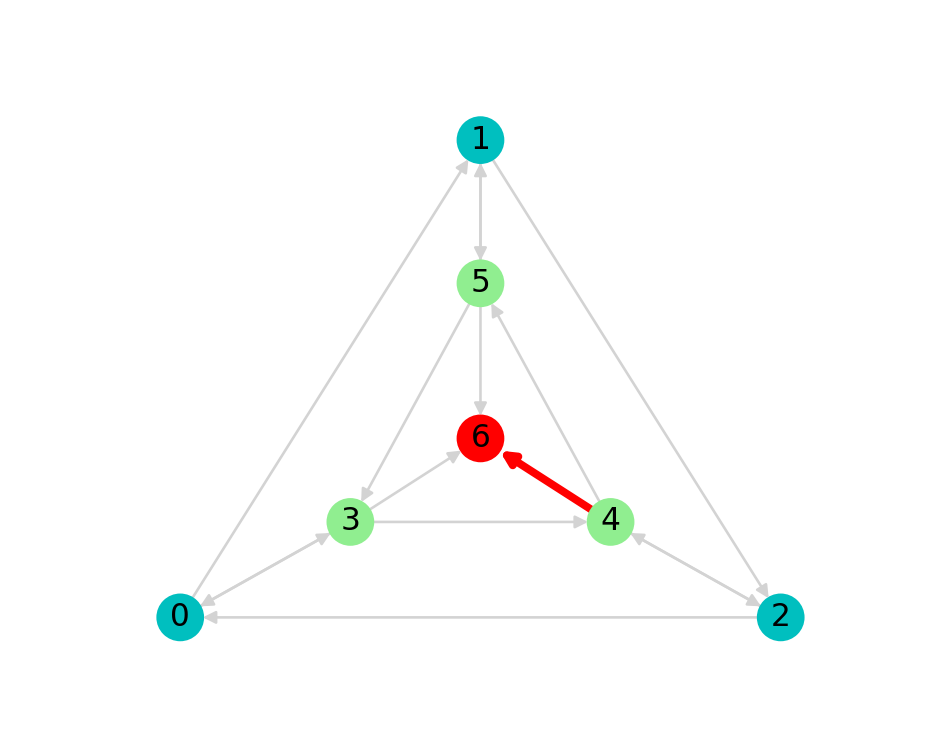

In [2]:
# DEFINING THE NETWORK
G =  nx.DiGraph()                                        # Directed graph

# Edges:
edgelist = [(0, 1), (0, 3), (1, 2), (1, 5), (2, 0), (2, 4), (3, 0), (3, 4), (3, 6),(4, 2), (4, 5),
            (4, 6), (5, 1), (5, 3), (5, 6)]              # This defines also the nodes
G.add_edges_from(edgelist)                               # Create a graph from the edge list
# What can be accessed from each node (dictionary)
adj_dict = {0: (1,3), 1: (2,5), 2: (0,4),  3: (0,4,6),  4: (2,5,6),  5: (1,3,6),}
# Set edge attributes  'width' and 'color' and their initial values
attrs = dict.fromkeys(G.edges, {"width":1, 'color':'lightgray'})  # Dictionary of edge attributes
nx.set_edge_attributes(G, attrs)                         # Attributes for the edges
e_colors = nx.get_edge_attributes(G,'color')             # Extract the edge colors into a dictionary
e_cols = list(e_colors.values())                         # Edge colors as a list for drawing
ewidth = nx.get_edge_attributes(G, 'width').values()     # Extract the edge widths into a dictionary
ewid = list(ewidth)                                      # Edge widths as a list for drawing

# Nodes:
# Node coordinates 
ps = {0:(0,0), 1:(3,4),  2:(6,0), 3:(1.7,0.8), 4:(4.3,0.8), 5:(3,2.8), 6:(3,1.5)}
# Node colors  (for nodes:[0, 1, 3, 2, 5, 4, 6])
ncols = ['c','c','lightgreen','c','lightgreen','lightgreen','y',] # 

# ANIMATION 
global n1                       # The starting node of the new edge                       
global n2                       # The final node of the new edge
n0 = 0                          # Start from the 0-node
n1 = 0                          # Start from the 0-node
idx = rnd.randint(0,1)          # Adjacent matrix index (to which node to continue from 0)
n2 = adj_dict[n1][idx]          # Node to go from n1, (which is initially 0)
G[n1][n2]['color']='r'          # Set the edge color to red
G[n1][n2]['width']= 3           # Thicken the edge
n0 = 0                          # Starting node  
n1 = n2                 # The end node of the recent edge becomes the start node of the next edge

def gen():                      # A generating function that creates a conditional loop ..
    i=0
    while n1< 6:                # ..for that the animation ends when node 6 is reached.
        i += 1                     
        yield i
        
# Frame update function
def animate(i):
    fig.clear()                 # Clears the image so that it doesn't always draw over and over
    plt.axis("off")             # No picture frames
    global n0
    global n1
                  
    if n1 < 3:                            # Being on the outer ring (nodes 0,1,2)
        p = rnd.random()
        if p < 0.9:                       # Stay on the outer ring
            idx = 0                       # Adjacent matrix index (staying on the outer ring)
        else:
            idx = 1                       # Go to inner ring 
        n2 = adj_dict[n1][idx]            # To which node we continue
        G[n1][n2]['color']='r'            # Color the next edge
        G[n1][n2]['width']=3              # Thicken the next edge
        G[n0][n1]['color']='lightgray'    # The previous edge to gray
        G[n0][n1]['width']=1              # Return the previous edge back to narrow
        
    else:                                 # Being on the inner ring (nodes 3,4,5)
        p = rnd.random() 
        if p < 0.2:                       # Go to outher ring
            idx = 0                       # Adjacent matrix index (to the outer ring)
        elif p > 0.95:
            idx = 2                       # Getting to 6,  GOAL!!!
        else:
            idx = 1                       # Stay on the inner ring
        n2 = adj_dict[n1][idx]            # Which node to go from node n1 (three possibilities)
        G[n1][n2]['color']='r'            # Colorize the next edge
        G[n1][n2]['width']=3              # Make the next edge thicker
        G[n0][n1]['color']='lightgray'    # The previous edge gray
        G[n0][n1]['width']=1              # The previous edge narrow
    n0 = n1          # The origin node of the new Edge becomes the origin node of the old edge.
    n1 = n2          # The end node of the previous edge becomes the origin node of the next edge.
                       
    if n1 == 6:      # When the goal node 6 is reached it is colored
        ncols[6] = 'r'
         
    # The network components are drawn separately
    nodes  = nx.draw_networkx_nodes(G, pos=ps, node_color=ncols)      # Draw nodes   
    e_colors = nx.get_edge_attributes(G,'color')                      # Edge colors into  dictionary
    e_cols =list(e_colors.values())                                   # Edge colors into list 
    ewidth = nx.get_edge_attributes(G, 'width').values()
    ewid = list(ewidth)
    nx.draw_networkx_edges(G, pos=ps, edge_color=e_cols, width=ewid)  # Draw edges
    labels = nx.draw_networkx_labels(G,pos=ps)                        # Draw nodelabels
    
fig = plt.figure(figsize=(5,4))
# By changing the 'interval' value, you can adjust the speed of the animation.  
anim = FuncAnimation(fig, animate, frames=gen, interval= 300, blit = True, repeat = False) # Animate